In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv('/content/merged_train.csv').sample(frac=0.1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191774 entries, 1652115 to 1033025
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    191774 non-null  float64
 1   Protocol Type    191774 non-null  float64
 2   Duration         191774 non-null  float64
 3   Rate             191774 non-null  float64
 4   Srate            191774 non-null  float64
 5   Drate            191774 non-null  float64
 6   fin_flag_number  191774 non-null  float64
 7   syn_flag_number  191774 non-null  float64
 8   rst_flag_number  191774 non-null  float64
 9   psh_flag_number  191774 non-null  float64
 10  ack_flag_number  191774 non-null  float64
 11  ece_flag_number  191774 non-null  float64
 12  cwr_flag_number  191774 non-null  float64
 13  ack_count        191774 non-null  float64
 14  syn_count        191774 non-null  float64
 15  fin_count        191774 non-null  float64
 16  rst_count        191774 non-null  fl

In [101]:
 df.describe()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,1.917740e+05,191774.000000,191774.000000,1.917740e+05,1.917740e+05,191774.0,191774.000000,191774.000000,191774.000000,191774.000000,...,191774.000000,191774.000000,191774.000000,1.917740e+05,191774.000000,191774.000000,191774.000000,191774.000000,191774.000000,191774.000000
mean,4.749215e+04,7.808363,64.936448,1.371146e+04,1.371146e+04,0.0,0.005291,0.164914,0.045374,0.029866,...,69.923455,11.120579,69.889970,8.467066e+07,9.498433,10.831437,15.708075,4809.206592,0.112259,141.512783
std,4.075095e+05,6.095815,10.486134,3.742801e+04,3.742801e+04,0.0,0.034241,0.343313,0.153001,0.112847,...,118.996082,55.459837,118.367305,2.108002e+07,0.996344,4.288979,78.402675,29659.708666,0.259337,25.640358
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,...,42.000000,0.000000,42.000000,0.000000e+00,1.000000,9.165151,0.000000,0.000000,0.000000,1.000000
25%,5.400000e+01,1.160000,64.000000,6.103092e+00,6.103092e+00,0.0,0.000000,0.000000,0.000000,0.000000,...,43.558644,0.000000,43.820000,8.467525e+07,9.500000,9.322697,0.000000,0.000000,0.000000,141.550000
50%,1.080000e+02,6.000000,64.000000,1.051005e+02,1.051005e+02,0.0,0.000000,0.000000,0.000000,0.000000,...,50.083839,0.000000,50.200000,8.469625e+07,9.500000,10.005708,0.000000,0.000000,0.000000,141.550000
75%,1.903575e+04,17.000000,64.000000,1.818138e+04,1.818138e+04,0.0,0.000000,0.000000,0.000000,0.000000,...,54.000000,0.179085,54.000000,8.469682e+07,9.500000,10.392305,0.229325,0.280825,0.050000,141.550000
max,9.675349e+06,17.000000,255.000000,2.097152e+06,2.097152e+06,0.0,0.850000,1.000000,1.000000,1.000000,...,1514.000000,721.150870,1514.000000,1.694694e+08,13.500000,55.027266,1020.232031,520437.887468,1.000000,244.600000


In [102]:
df=df.drop('Drate', axis=1)

<Axes: >

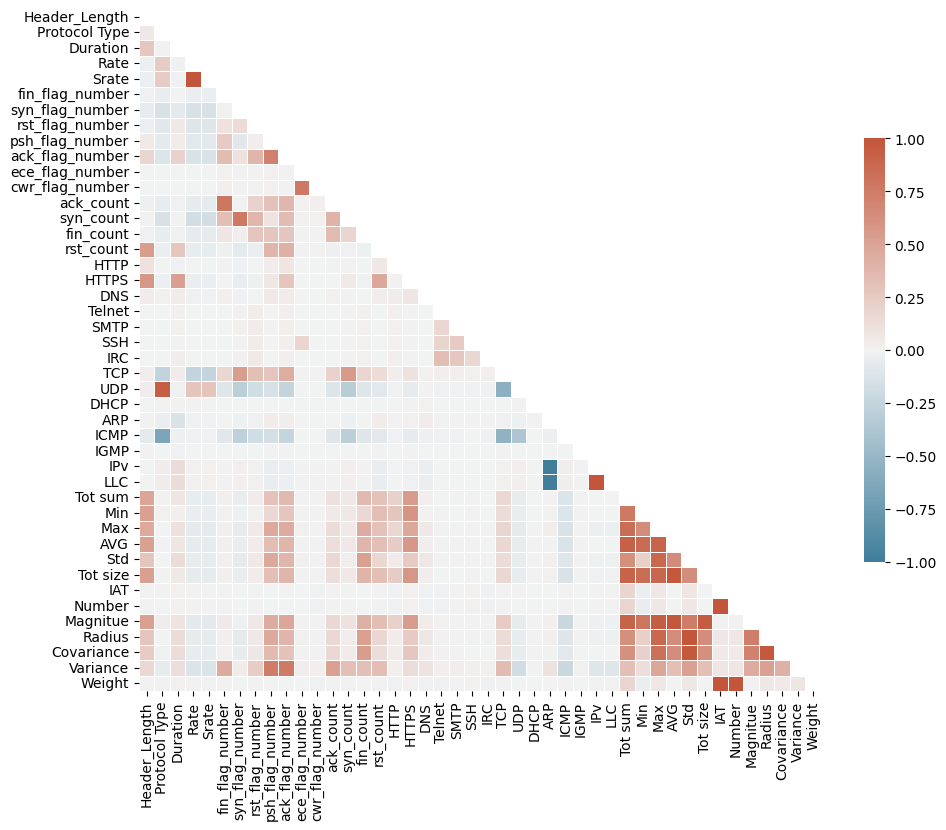

In [103]:
# Compute the correlation matrix
corr = df.drop(['attack','category'], axis=1).corr(method = 'pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [104]:
to_drop = ["Srate", "Protocol Type", "IPv", "LLC", "Tot sum", "Tot size", "AVG", "Max", "Number", "Weight"]

In [105]:
print(df['category'].unique())
df['is_benign'] = df['category'].apply(lambda x: 1 if x == 'BENIGN' else 0)
df_sel1 = df.drop(to_drop, axis=1)

['RECON' 'DoS' 'DDoS' 'MQTT' 'BENIGN' 'SPOOFING']


In [106]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_sel1.drop(['is_benign', 'category', 'attack'], axis=1), df_sel1['is_benign'], train_size=0.7)

In [107]:
from sklearn.ensemble import RandomForestClassifier

rnd_forest = RandomForestClassifier()
rnd_forest.fit(X_train, y_train)

RandomForestClassifier()

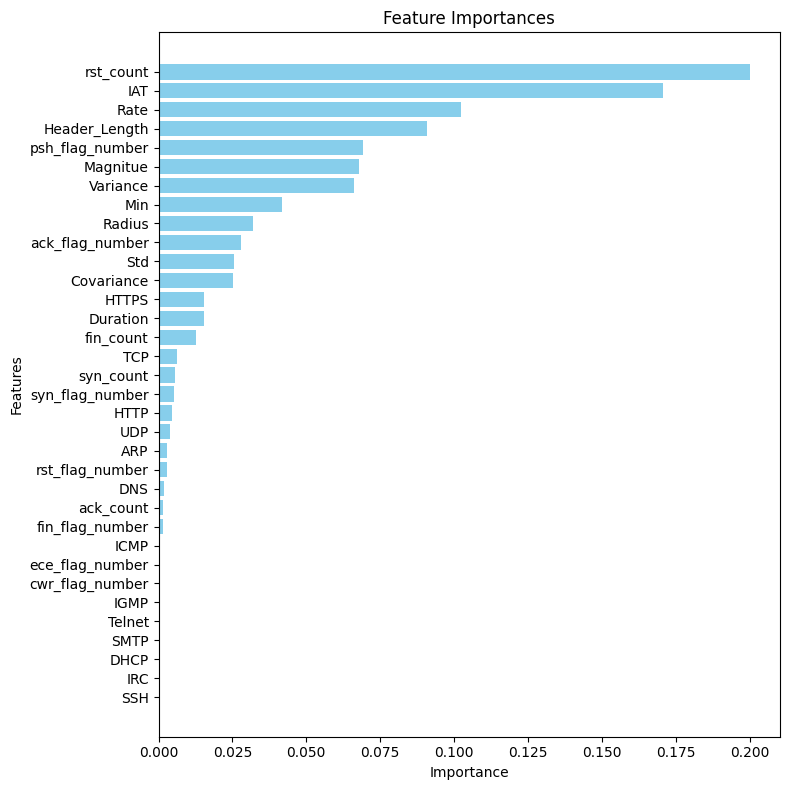

In [108]:
feature_importances_dict = dict(zip(X_train.columns, rnd_forest.feature_importances_))

# Sort features by importance
sorted_dict = dict(sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=False))

# Create plot
plt.figure(figsize=(8,8))
plt.barh([*sorted_dict.keys()], sorted_dict.values(), color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [109]:
import multiprocessing

# Get the number of CPU cores
num_cores = multiprocessing.cpu_count()

print(f"Number of CPU cores detected: {num_cores}")

Number of CPU cores detected: 2


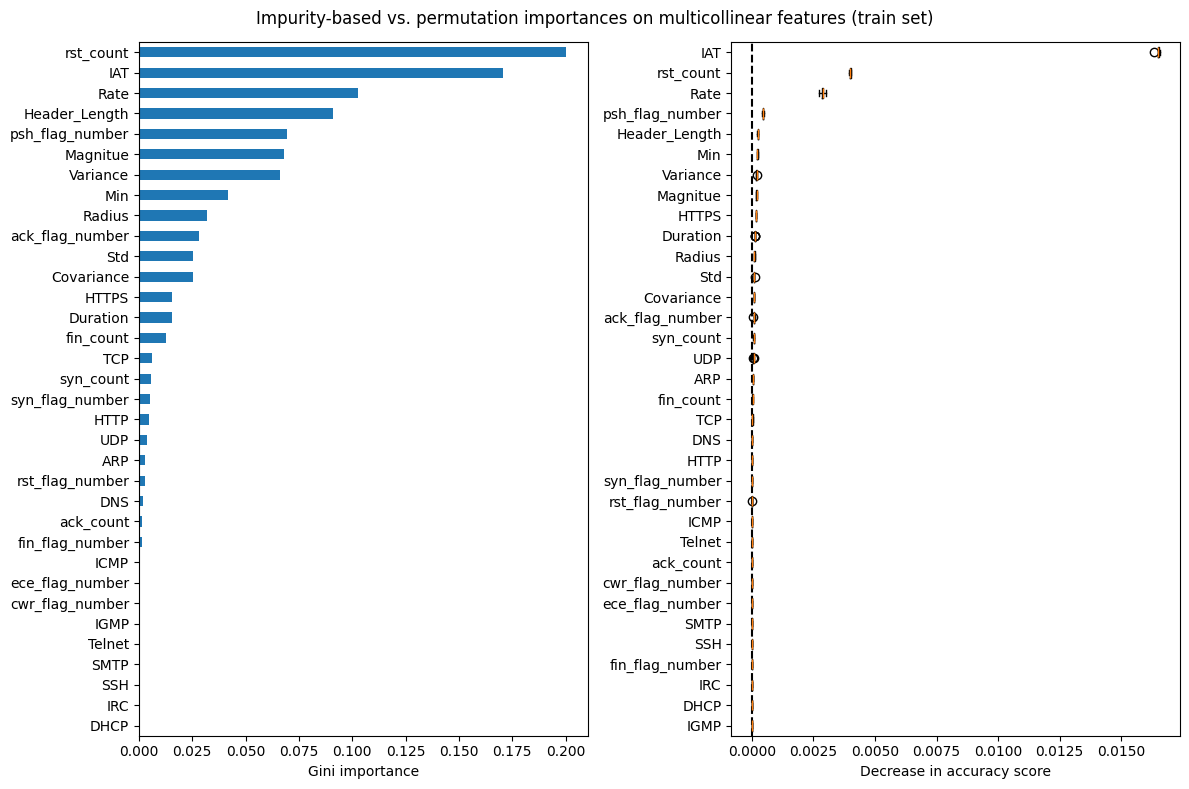

In [110]:
from sklearn.inspection import permutation_importance

def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=num_cores)
    perm_sorted_idx = result.importances_mean.argsort()
    tick_labels_dict = {'labels': X.columns[perm_sorted_idx]}
    ax.boxplot(result.importances[perm_sorted_idx].T, vert=False, **tick_labels_dict)
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

mdi_importances = pd.Series(rnd_forest.feature_importances_, index=X_train.columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(rnd_forest, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

In [111]:
y_pred = rnd_forest.predict(X_val)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Accuracy:        {accuracy:.5f}")
print(f"Precision:       {precision:.5f}")
print(f"Recall:          {recall:.5f}")
print(f"F1:              {f1:.5f}")

Accuracy:        0.99790
Precision:       0.96669
Recall:          0.94501
F1:              0.95573


Using Spearman correlation for hierarchical clustering is beneficial because:

It captures both linear and non-linear monotonic relationships.
It is robust to outliers and non-normal distributions.
It better reflects the dependencies in real-world data, ensuring more meaningful clustering of collinear features.

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


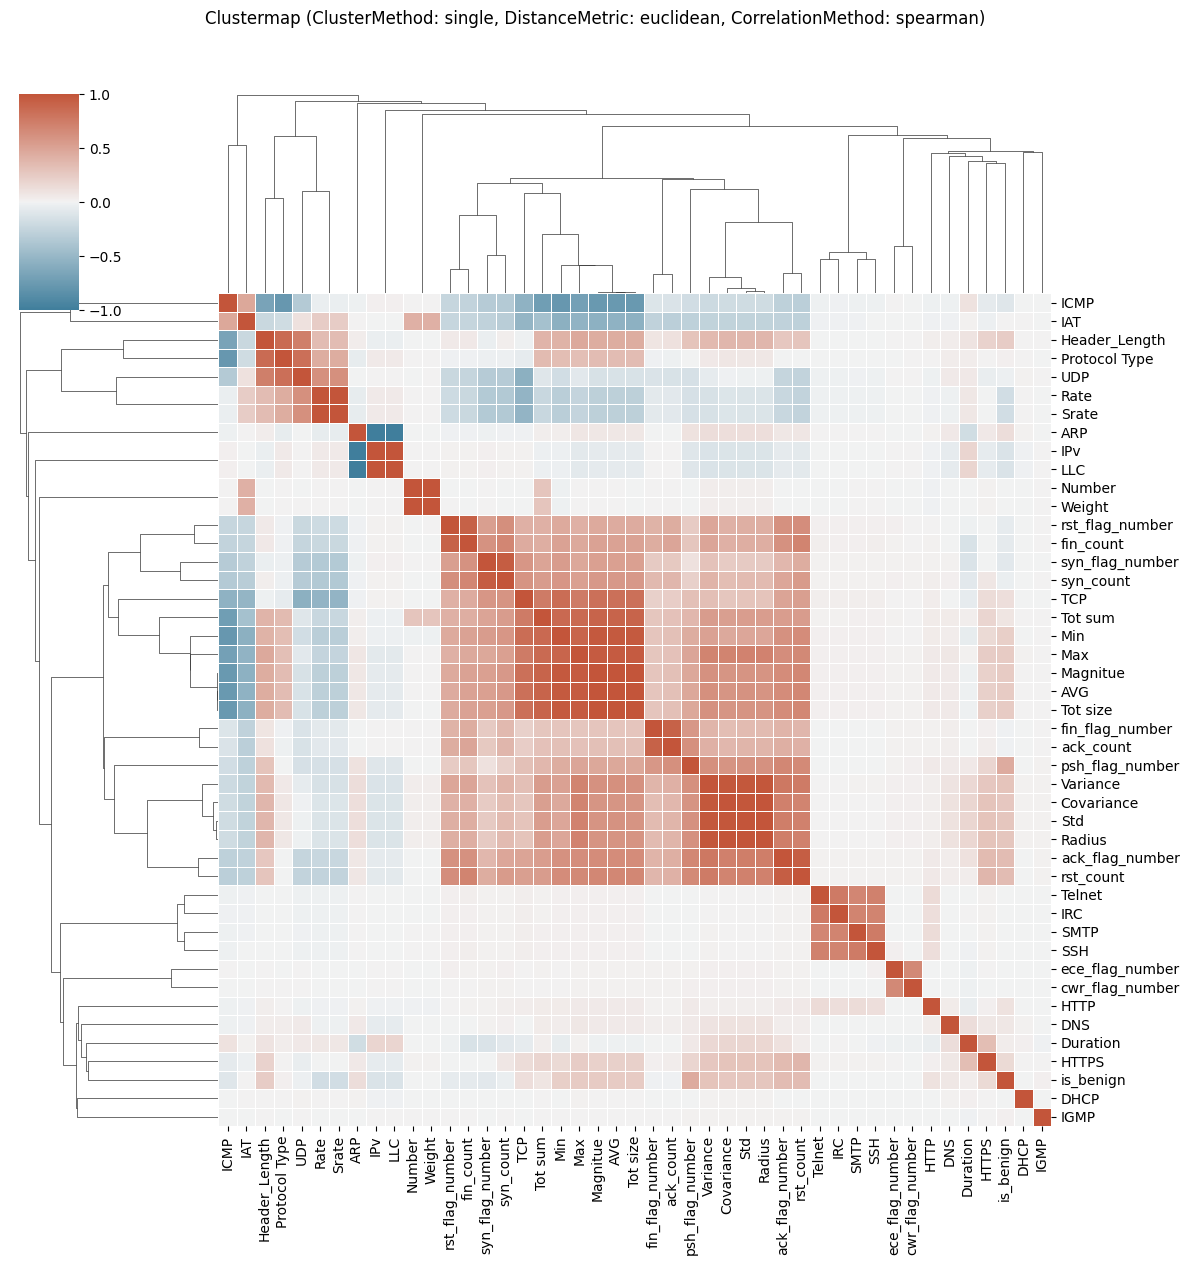

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


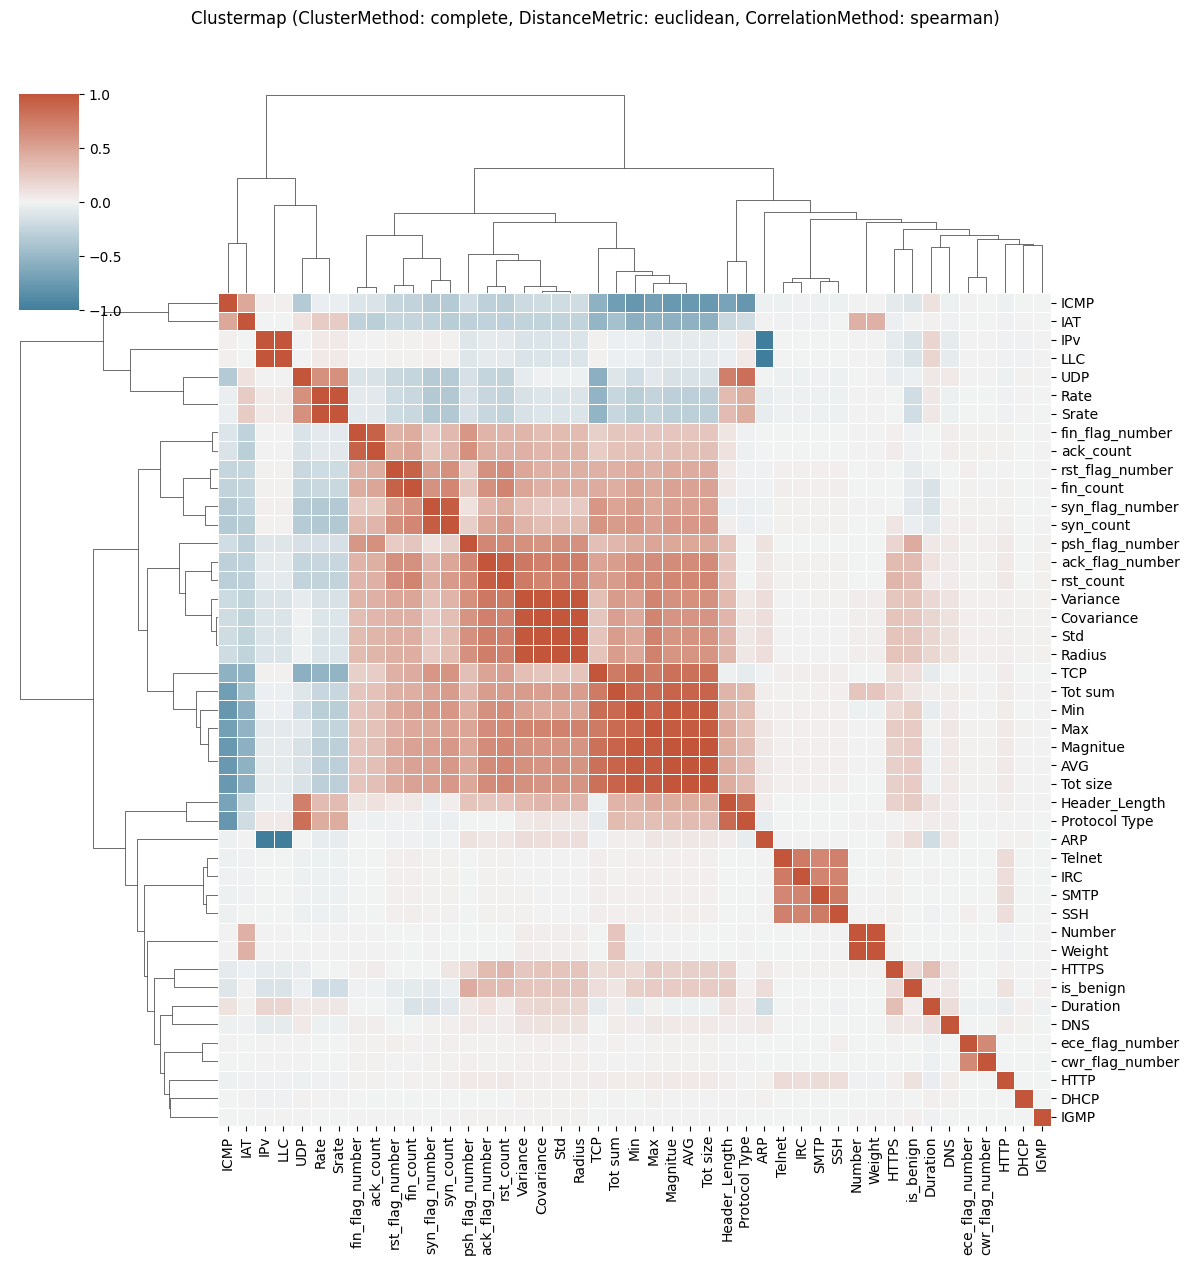

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


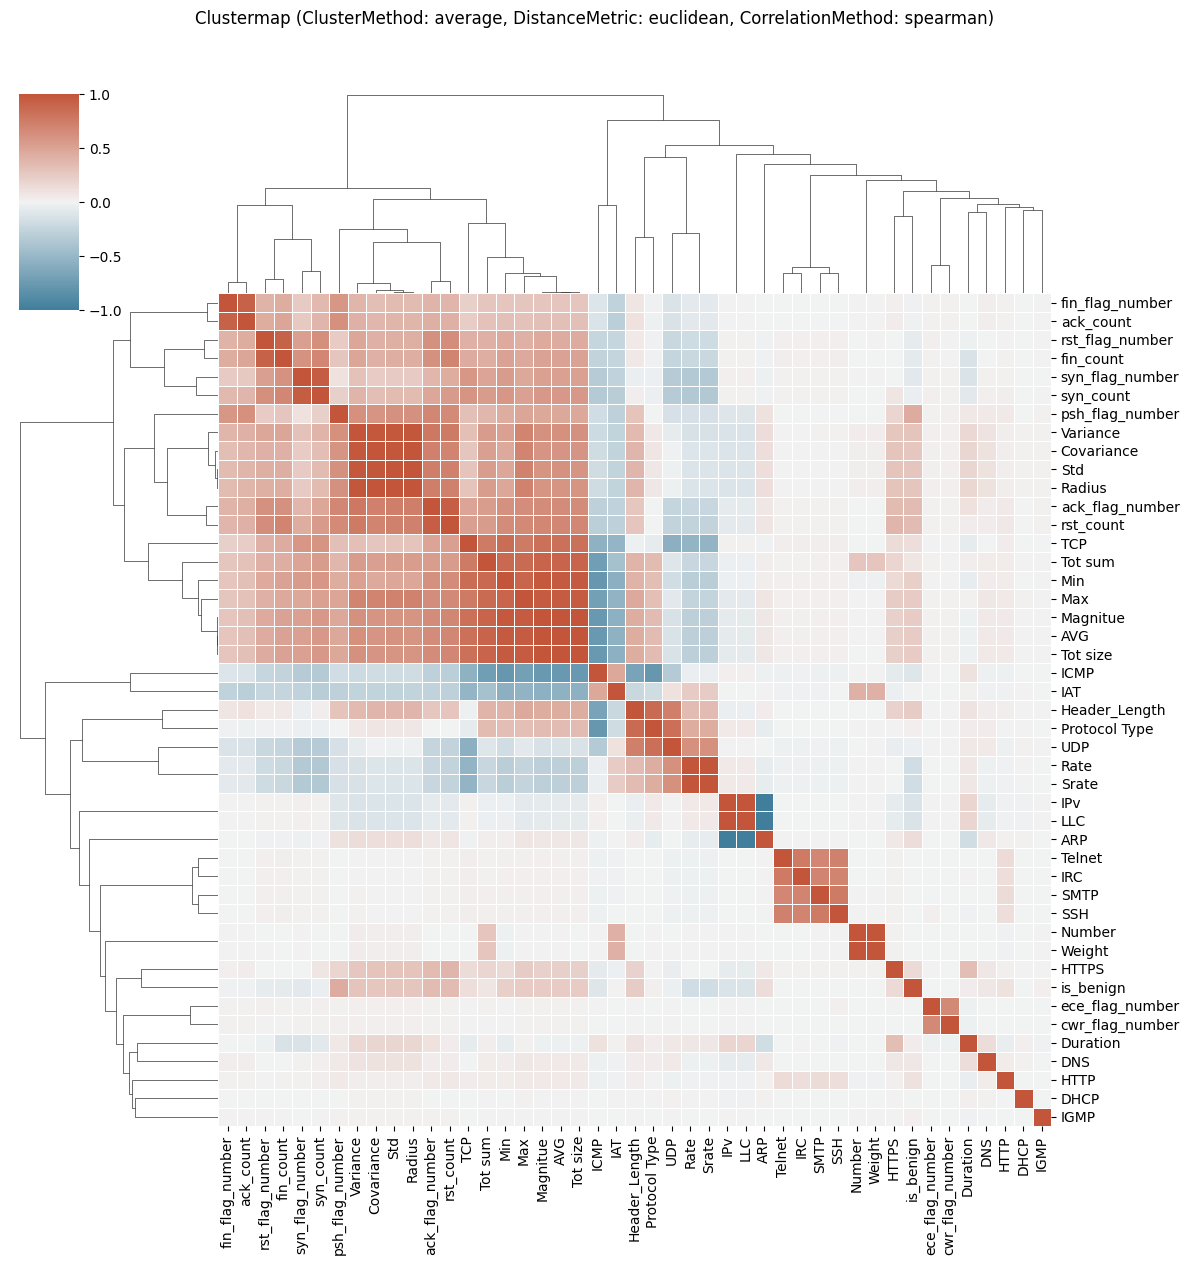

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


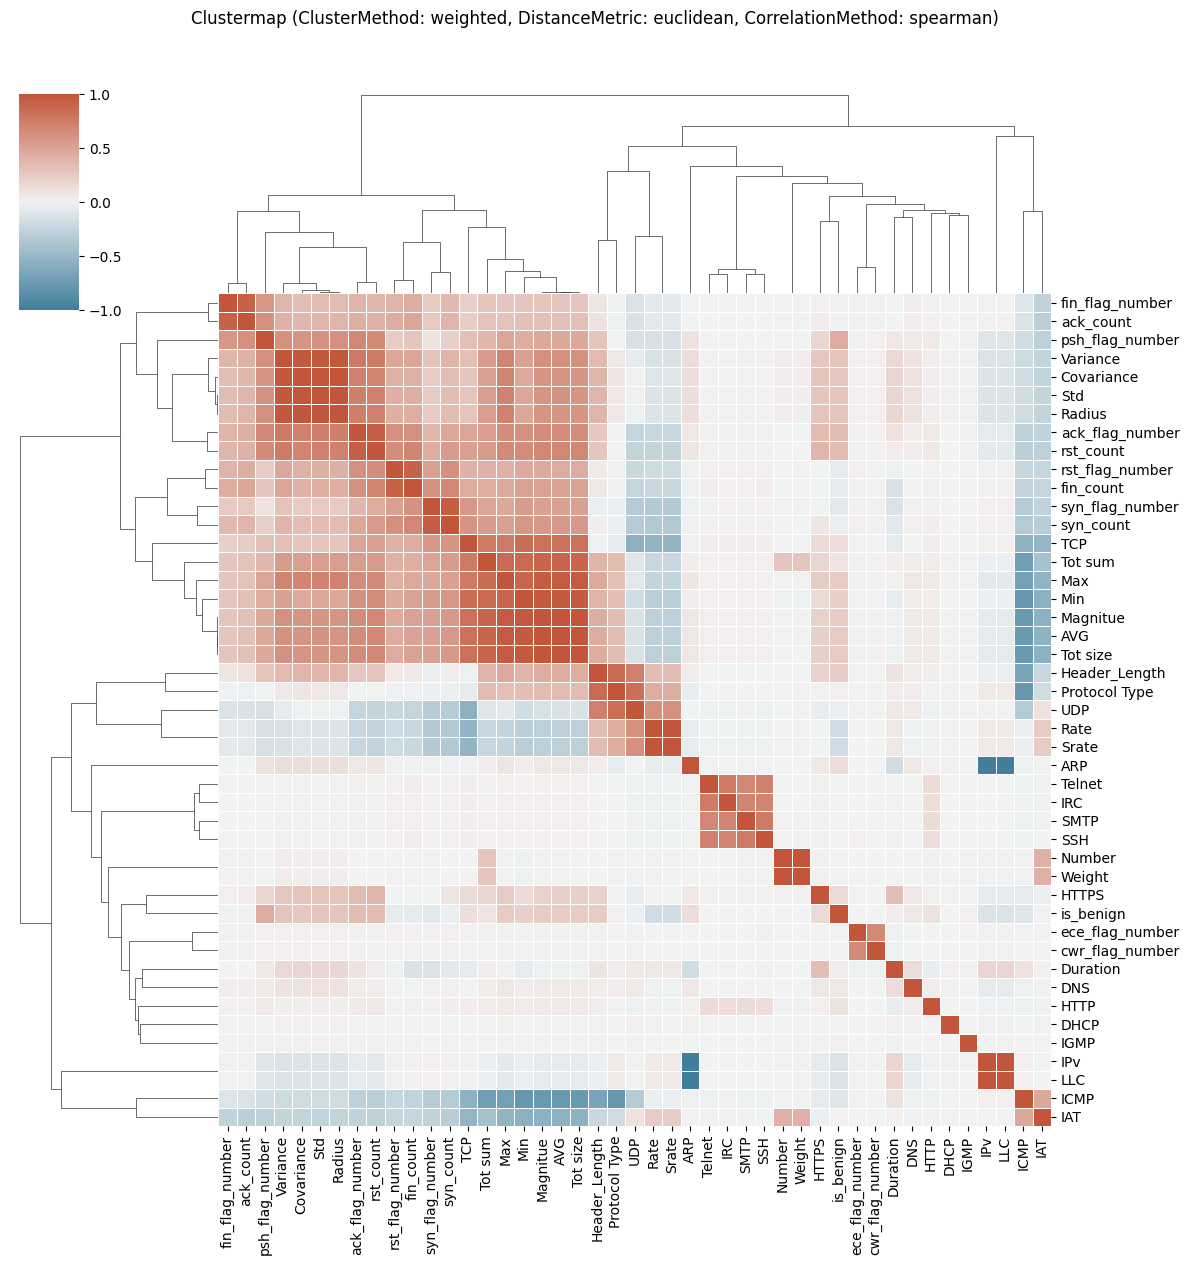

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


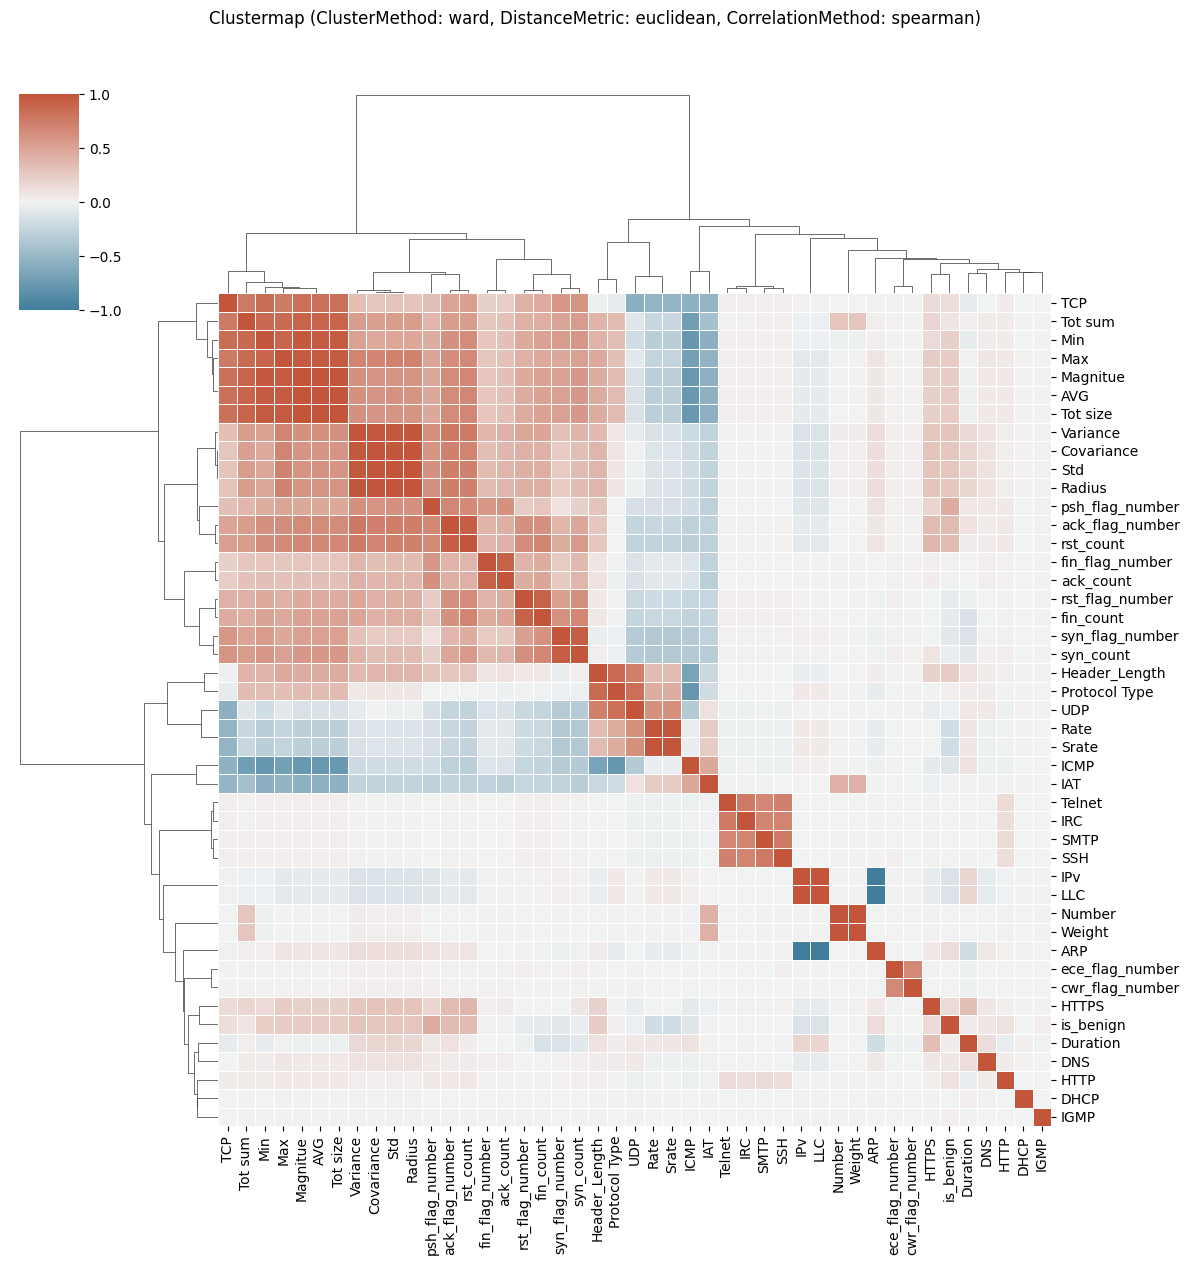

In [112]:
corr_method = 'spearman'
corr = df.drop(['attack','category'], axis=1).corr(method=corr_method)

# Define linkage methods to test
linkage_methods = ['single', 'complete', 'average', 'weighted', 'ward']

# Fixed metric
metric = 'euclidean'

# Iterate through linkage methods and plot
for method in linkage_methods:
        g = sns.clustermap(corr, annot=False, figsize=(12, 12), cbar=True, cmap=cmap, center=0,
                           square=True, linewidths=.5, cbar_kws={"shrink": .5},
                           metric=metric, method=method)

        g.fig.suptitle(f"Clustermap (ClusterMethod: {method}, DistanceMetric: {metric}, CorrelationMethod: {corr_method})", y=1.05)
        plt.show()

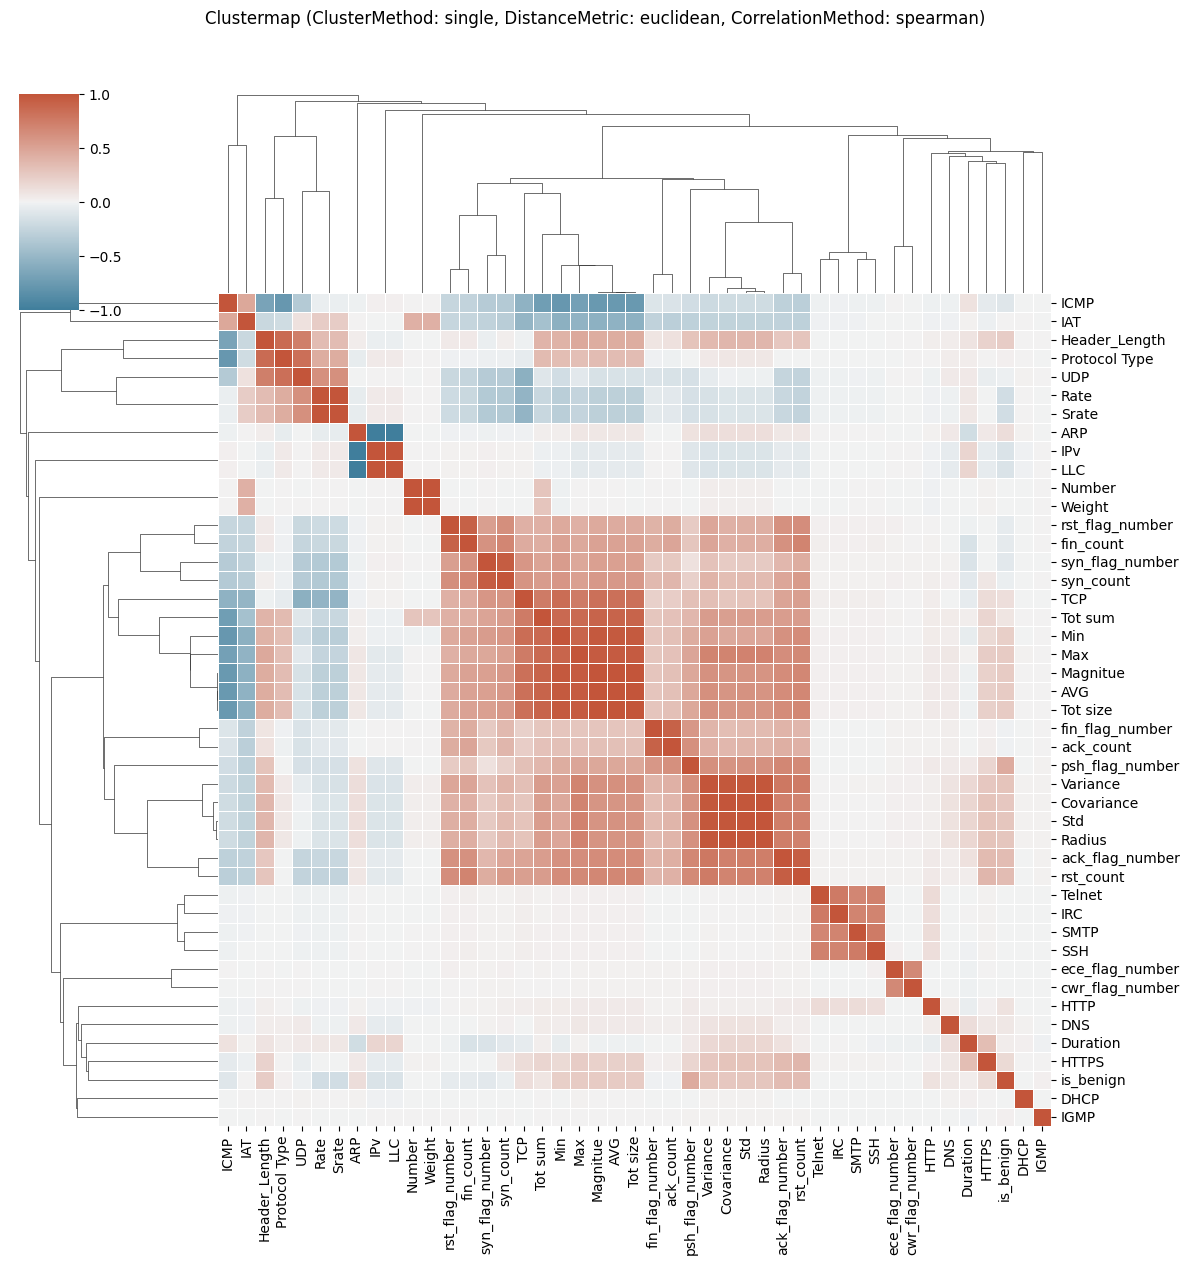

In [125]:
corr_method = 'spearman'
link_method = 'single'
dist_metric = 'euclidean'

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

corr = df.drop(['attack','category'], axis=1).corr(method=corr_method)

g = sns.clustermap(corr, annot=False, figsize=(12, 12), cbar=True, cmap=cmap, center=0,
                   linewidths=.5, cbar_kws={"shrink": .5},
                   metric=dist_metric, method=link_method)

g.fig.suptitle(f"Clustermap (ClusterMethod: {link_method}, DistanceMetric: {dist_metric}, CorrelationMethod: {corr_method})", y=1.05)
plt.show()

In [129]:
to_drop2 = ['Srate', 'Protocol Type', 'IPv', 'ece_flag_number', 'Telnet', 'SMTP', 'IRC', 'Weight', "Tot size", "Max", 'Min', 'Magnitue', 'fin_flag_number', 'Covariance', 'Std', 'Radius', 'ack_flag_number','rst_flag_number', 'syn_flag_number' ]
to_keep = ['Duration', 'cwr_flag_number', 'SSH', "rst_count", "Number", 'LLC', 'ARP', 'Rate', 'Header_Length', 'ICMP', 'IAT', 'is_benign', 'category', 'attack']

df_sel2 = df[to_keep] # = df.drop(to_drop2, axis=1)

In [130]:
X_train, X_val, y_train, y_val = train_test_split(df_sel2.drop(['is_benign', 'category', 'attack'], axis=1), df_sel2['is_benign'], train_size=0.7)

In [131]:
rnd_forest.fit(X_train, y_train)

RandomForestClassifier()

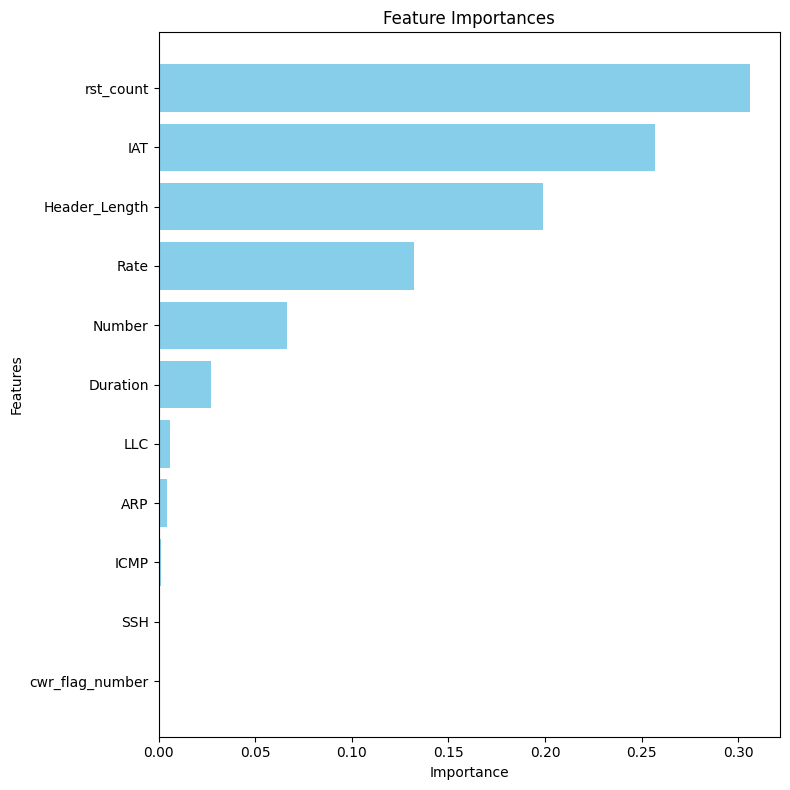

In [132]:
feature_importances_dict = dict(zip(X_train.columns, rnd_forest.feature_importances_))

# Sort features by importance
sorted_dict = dict(sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=False))

# Create plot
plt.figure(figsize=(8,8))
plt.barh([*sorted_dict.keys()], sorted_dict.values(), color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

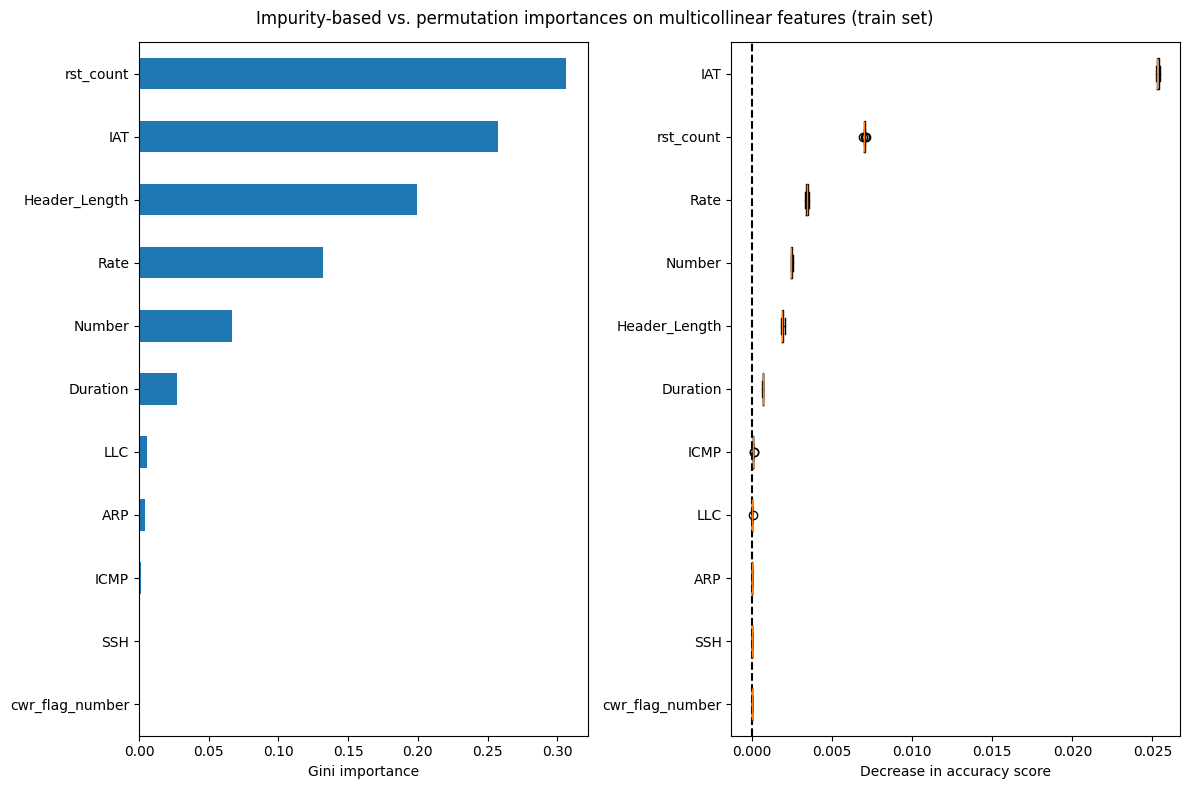

In [133]:
mdi_importances = pd.Series(rnd_forest.feature_importances_, index=X_train.columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(rnd_forest, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

In [134]:
y_pred = rnd_forest.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Accuracy:        {accuracy:.5f}")
print(f"Precision:       {precision:.5f}")
print(f"Recall:          {recall:.5f}")
print(f"F1:              {f1:.5f}")

Accuracy:        0.99800
Precision:       0.96400
Recall:          0.95210
F1:              0.95801
